In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from scipy import stats 
import warnings
warnings.filterwarnings('ignore')

# Project 1-KNN

CONTEXT: Medical research university X is undergoing a deep research on patients with certain conditions. 
University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by 
the client by providing different datasets to the AI team for developing a AIML model which can predict the 
condition of the patient depending on the received test results. 
• DATA DESCRIPTION: The data consists of biomechanics features of the patients according to their current 
conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and 
orientation of the condition to their body part.
1. P_incidence
2. P_tilt
3. L_angle 
4. S_slope
5. P_radius 
6. S_degree
7. Class

Steps and tasks: [ Total score: 30 points ]
1. Import and warehouse data:
• Import all the given datasets and explore shape and size of each.
• Merge all datasets onto one and explore final shape and size.

# loading source datasets

In [2]:
df1=pd.read_csv("Part1 - Normal.csv")
df2=pd.read_csv("Part1 - Type_H.csv")
df3=pd.read_csv("Part1 - Type_S.csv")

# Exploring shapes of source datasets

In [3]:
df1.shapehttp://localhost:8888/notebooks/OneDrive/Documents/supervised%20learning%20project/Supervised%20learning%20project.ipynb#Exploring-shapes-of-source-datasets

(100, 7)

In [4]:
df2.shape

(60, 7)

In [5]:
df3.shape

(150, 7)

no of columns in three datasets is same


In [6]:
df1.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [7]:
df2.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

In [8]:
df3.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

All column names are same so we can concatenate in row level

In [9]:
df=pd.concat([df1,df2,df3], ignore_index=True, sort=False) #final dataframe

In [10]:
df.shape

(310, 7)

In [11]:
df.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')

2. Data cleansing:
• Explore and if required correct the datatypes of each attribute
• Explore for null values in the attributes and if required drop or impute values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


No null values found

In [13]:
df['Class'].unique()

array(['Normal', 'Nrmal', 'Type_H', 'type_h', 'Type_S', 'tp_s'],
      dtype=object)

In [14]:
#we can find typo errors in object type columns
df['Class']=df['Class'].replace(['Nrmal','type_h','tp_s'],['Normal','Type_H','Type_S'])

In [15]:
df['Class'].unique() #errors are replaced with proper categories

array(['Normal', 'Type_H', 'Type_S'], dtype=object)

In [16]:
df['Class'].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

3. Data analysis & visualisation:
• Perform detailed statistical analysis on the data.
• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each 
analysis. 

In [17]:
#statistical Analysis
df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


# Univariate Analysis

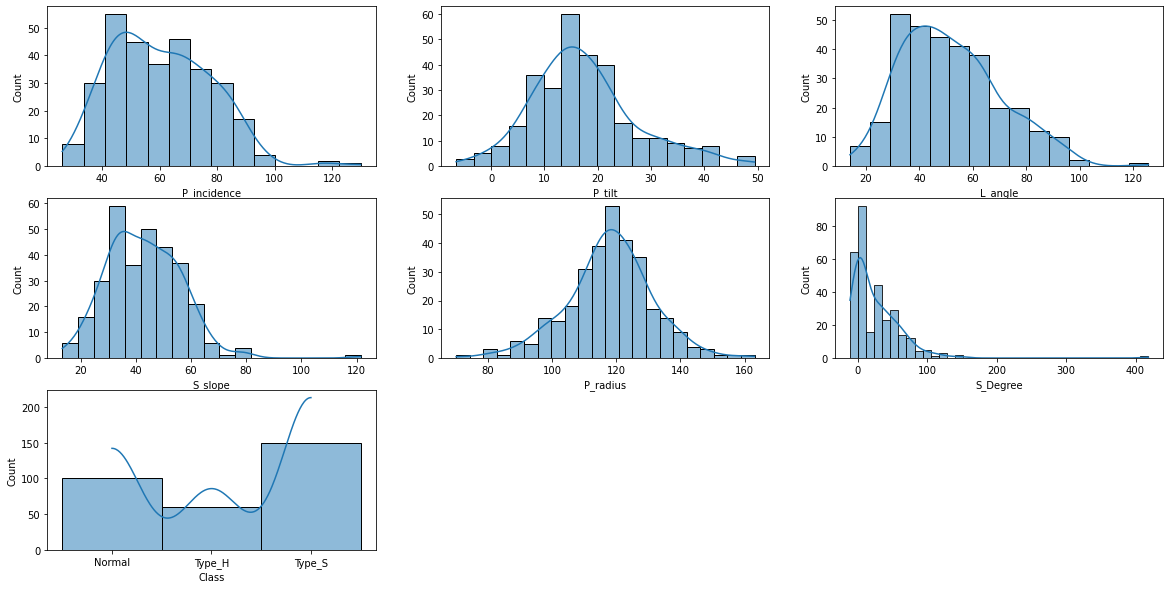

In [18]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.histplot(df,x='P_incidence',kde=True)
plt.subplot(3,3,2)
sns.histplot(df,x='P_tilt',kde=True )
plt.subplot(3,3,3)
sns.histplot(df,x='L_angle' ,kde=True )
plt.subplot(3,3,4)
sns.histplot(df,x='S_slope' ,kde=True )
plt.subplot(3,3,5)
sns.histplot(df,x='P_radius' ,kde=True )
plt.subplot(3,3,6)
sns.histplot(df,x='S_Degree' ,kde=True )
plt.subplot(3,3,7)
sns.histplot(df,x='Class' ,kde=True )
plt.show()

# Conclusions on Univariate Analysis

1.Most frequent value of P_incidence is in between 40-50 and it has few outliers above 120.

2.Most frequent value of P_tilt is in between 14-17 and it is mildly right skewed.

3.Most frequent value of L_angle is in between 30-40 and it has few outliers above 120.

4.Most frequent value of S_slope is in between 30-40 and it is right skewed.

5.Most frequent value of P_radius is in between 110-120 and normally distributed.

6.Most frequent value of S_Degree is in between 0-10 and it is extremely right skewed.

7.We can find unbalanced values for Class so we have to be careful when we use train_test_split.

8.Most frequent value for class is Type_s then Normal and least number of occurence is for Type_H.

# Bivariate Analysis

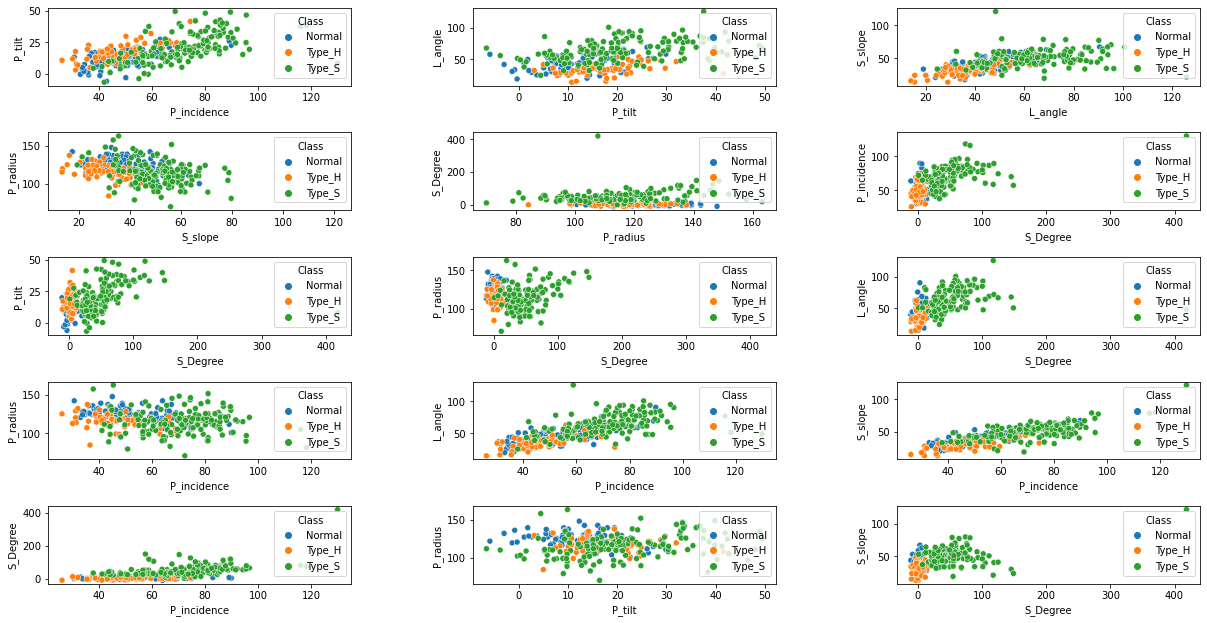

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(5,3,1)
sns.scatterplot(data=df,x='P_incidence',y='P_tilt',hue='Class')
plt.subplot(5,3,2)
sns.scatterplot(data=df,x='P_tilt',y='L_angle',hue='Class')
plt.subplot(5,3,3)
sns.scatterplot(data=df,x='L_angle' ,y='S_slope',hue='Class')
plt.subplot(5,3,4)
sns.scatterplot(data=df,x='S_slope' ,y='P_radius',hue='Class')
plt.subplot(5,3,5)
sns.scatterplot(data=df,x='P_radius' ,y='S_Degree',hue='Class')
plt.subplot(5,3,6)
sns.scatterplot(data=df,x='S_Degree' ,y='P_incidence',hue='Class')
plt.subplot(5,3,7)
sns.scatterplot(data=df,x='S_Degree' ,y='P_tilt',hue='Class')
plt.subplot(5,3,8)
sns.scatterplot(data=df,x='S_Degree' ,y='P_radius',hue='Class')
plt.subplot(5,3,9)
sns.scatterplot(data=df,x='S_Degree' ,y='L_angle',hue='Class')
plt.subplot(5,3,10)
sns.scatterplot(data=df,x='P_incidence',y='P_radius',hue='Class')
plt.subplot(5,3,11)
sns.scatterplot(data=df,x='P_incidence',y='L_angle',hue='Class')
plt.subplot(5,3,12)
sns.scatterplot(data=df,x='P_incidence',y='S_slope',hue='Class')
plt.subplot(5,3,13)
sns.scatterplot(data=df,x='P_incidence',y='S_Degree',hue='Class')
plt.subplot(5,3,14)
sns.scatterplot(data=df,x='P_tilt',y='P_radius',hue='Class')
plt.subplot(5,3,15)
sns.scatterplot(data=df,x='S_Degree',y='S_slope',hue='Class')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)
plt.show()

# Conclusions

1.P_incidence has positive relation with p_tilt,L_angle,S_slope and S_degree.

2.P_tilt has positive relation with S_degree,P_radius,P_incidence and l_angle.

3.L_angle has positive relation with S_degree,P_tilt,P_incidence and s_slope.

4.S_degree  has positive relation with L_angle,P_tilt,P_incidence and s_slope.

5.P_radius has positive relation with P_tilt and negative relation with other columns.

In [20]:
df.corr()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


Only P_radius has negative correlation with other column except P_tilt  and other columns has strong postive correlation with each other.This may lead to multicollinearity

As we are going to use KNN , multicollinearity has less effect so no need to  handle multicollinearity for this part.

# Multivariant Analysis

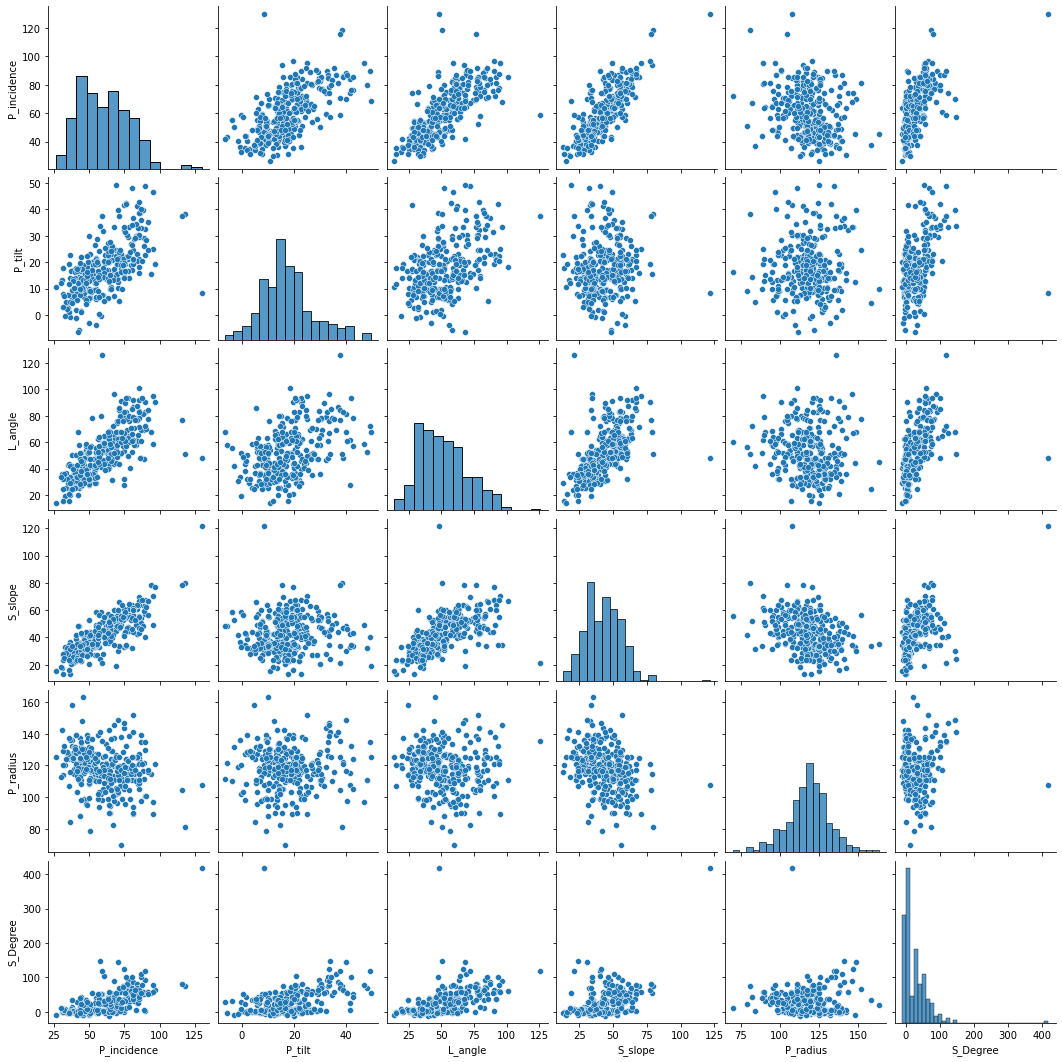

In [21]:
sns.pairplot(df)

<AxesSubplot:>

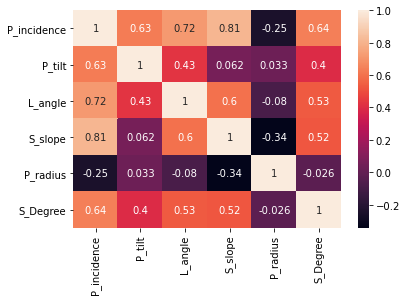

In [22]:
sns.heatmap(df.corr(), annot=True)  # plot the correlation coefficients as a heatmap

4. Data pre-processing:
• Segregate predictors vs target attributes
• Perform normalisation or scaling if required.
• Check for target balancing. Add your comments.
• Perform train-test split.


In [23]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Class'] = label.fit_transform(df['Class'])

In [24]:
df.head(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0


In [25]:
df['Class'].unique() #label encoding 0-normal 1-Type_H 2-Type-s

array([0, 1, 2])

In [26]:
#standardization of data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [27]:
X_std = pd.DataFrame(StandardScaler().fit_transform(df.iloc[:,:-1]))


In [28]:
df1=df.iloc[:,:-1]

In [29]:
df1.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree'], dtype='object')

In [30]:
X_std.columns=df1.columns #transforming only continuous variable into single standard

In [31]:
X_std

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,-1.277922,-0.057898,-0.907904,-1.597803,0.730468,-0.488288
1,-0.324010,0.142672,-0.017786,-0.522437,0.596124,-0.647896
2,-0.937559,-0.860412,-0.271475,-0.562386,0.849889,-0.568091
3,-0.707649,-0.009077,-0.212206,-0.901920,0.831811,-0.725568
4,-0.859732,-0.688835,-0.504914,-0.590377,0.921914,-0.791650
...,...,...,...,...,...,...
305,1.139826,1.641245,1.790676,0.239923,0.577094,1.973295
306,2.032901,2.902995,0.381614,0.445948,-1.597243,1.359695
307,0.790186,0.128191,1.301073,0.919094,0.788596,1.255828
308,1.579575,0.282500,2.261457,1.817689,0.227452,1.344962


In [32]:
X=X_std.iloc[:,0:-1] #Predictors

In [33]:
y=df['Class'] #Target

In [34]:
from sklearn.model_selection import train_test_split



# split into train and test
#There is a possibilty that there is a imbalance when we split  train and test ,the either dataset may have bias towards single category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors = 7)
# fitting the model
knn.fit(X_train, y_train)
# predict the response
y_pred = knn.predict(X_test)


In [37]:
print(accuracy_score(y_test, y_pred))

0.7741935483870968


Without target balancing accuracy 77%

# Handling target imbalance using SMOTE

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [40]:
X_resampled.columns

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius'], dtype='object')

In [41]:
y_resampled.value_counts()

0    123
1    123
2    123
Name: Class, dtype: int64

5. Model training, testing and tuning:
• Design and train a KNN classifier.
• Display the classification accuracies for train and test data.
• Display and explain the classification report in detail.
• Automate the task of finding best values of K for KNN.
• Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained 
model with your comments for selecting this model.

In [42]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)
# fitting the model
knn.fit(X_resampled, y_resampled)
# predict the response
y_pred = knn.predict(X_test)


In [43]:
y_pred

array([2, 1, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0,
       2, 1, 2, 2, 2, 0, 1, 2, 0, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 2,
       1, 0, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 0, 0, 0, 2])

In [44]:
print(accuracy_score(y_test, y_pred))


0.7903225806451613


In [45]:
# instantiate learning model (k = 15)
knn = KNeighborsClassifier(n_neighbors = 15)
# fitting the model
knn.fit(X_resampled, y_resampled)
# predict the response
y_pred = knn.predict(X_test)

In [46]:
print(accuracy_score(y_test, y_pred))

0.7741935483870968


# Automation of K value

In [47]:
# creating odd list of K for KNN
mylist = list(range(1,50,2))



In [48]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in mylist:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_resampled, y_resampled)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = mylist[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 5


In [49]:
MSE

[0.22580645161290325,
 0.20967741935483875,
 0.17741935483870963,
 0.25806451612903225,
 0.20967741935483875,
 0.20967741935483875,
 0.22580645161290325,
 0.22580645161290325,
 0.24193548387096775,
 0.24193548387096775,
 0.24193548387096775,
 0.25806451612903225,
 0.25806451612903225,
 0.27419354838709675,
 0.27419354838709675,
 0.25806451612903225,
 0.27419354838709675,
 0.27419354838709675,
 0.29032258064516125,
 0.27419354838709675,
 0.25806451612903225,
 0.27419354838709675,
 0.27419354838709675,
 0.29032258064516125,
 0.29032258064516125]

In [50]:
ac_scores #maximum accuracy 

[0.7741935483870968,
 0.7903225806451613,
 0.8225806451612904,
 0.7419354838709677,
 0.7903225806451613,
 0.7903225806451613,
 0.7741935483870968,
 0.7741935483870968,
 0.7580645161290323,
 0.7580645161290323,
 0.7580645161290323,
 0.7419354838709677,
 0.7419354838709677,
 0.7258064516129032,
 0.7258064516129032,
 0.7419354838709677,
 0.7258064516129032,
 0.7258064516129032,
 0.7096774193548387,
 0.7258064516129032,
 0.7419354838709677,
 0.7258064516129032,
 0.7258064516129032,
 0.7096774193548387,
 0.7096774193548387]

In [51]:
# instantiate learning model for optimal value 
knn = KNeighborsClassifier(n_neighbors =optimal_k)
# fitting the model
knn.fit(X_resampled, y_resampled)
# predict the response
y_pred = knn.predict(X_test)

In [52]:
print(accuracy_score(y_test, y_pred))

0.8225806451612904


In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
confusion_matrix(y_test, y_pred) 

array([[16,  1,  4],
       [ 3, 11,  0],
       [ 2,  1, 24]], dtype=int64)

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        21
           1       0.85      0.79      0.81        14
           2       0.86      0.89      0.87        27

    accuracy                           0.82        62
   macro avg       0.82      0.81      0.82        62
weighted avg       0.82      0.82      0.82        62



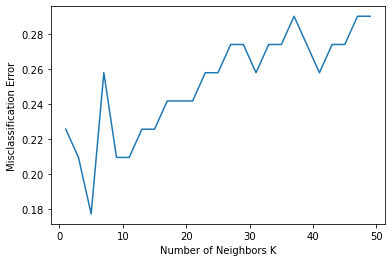

In [57]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(mylist, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# Conclusions:


SMOTE technique has high accuracy on average so target imbalancing can be handled using SMOTE

# PART TWO

DOMAIN: Banking and finance
• CONTEXT: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee 
majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the 
borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an 
average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing 
department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit 
with same budget as per last campaign. 

PROJECT OBJECTIVE: Build an AIML model to perform focused marketing by predicting the potential customers who will 
convert using the historical dataset.
 Steps and tasks: [ Total Score: 30 points ]
1. Import and warehouse data:
• Import all the given datasets and explore shape and size of each.
• Merge all datasets onto one and explore final shape and size

In [58]:
d1=pd.read_csv("Part2 - Data1.csv")
d2=pd.read_csv("Part2 -Data2.csv")

In [59]:
d1.shape

(5000, 8)

In [60]:
d2.shape

(5000, 7)

In [61]:
d1.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')

In [62]:
d2.columns

Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')

In [63]:
#both data set has same no of rows ,we have to join both datasets into one with no of column as 14
data=d1.merge(d2,how='outer',on='ID')
#merging two data set on outer join using id field

In [64]:
data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [65]:
data.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

In [66]:
data['Security'].unique()

array([1, 0], dtype=int64)

In [67]:
data['FixedDepositAccount'].unique()

array([0, 1], dtype=int64)

In [68]:
data['InternetBanking'].unique()

array([0, 1], dtype=int64)

In [69]:
data['CreditCard'].unique()

array([0, 1], dtype=int64)

Above columns are binary so changing data type to string will be helpful for classification

In [70]:
data=data.drop('ID', axis =1 ) # dropping this column as it will be 1-1 mapping anyways

In [71]:
data=data.drop('ZipCode', axis =1 ) # dropping this column as it will not  be relevant for our predictions

In [72]:
data.shape

(5000, 12)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   CustomerSince        5000 non-null   int64  
 2   HighestSpend         5000 non-null   int64  
 3   HiddenScore          5000 non-null   int64  
 4   MonthlyAverageSpend  5000 non-null   float64
 5   Level                5000 non-null   int64  
 6   Mortgage             5000 non-null   int64  
 7   Security             5000 non-null   int64  
 8   FixedDepositAccount  5000 non-null   int64  
 9   InternetBanking      5000 non-null   int64  
 10  CreditCard           5000 non-null   int64  
 11  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(10)
memory usage: 507.8 KB


2. Data cleansing:
• Explore and if required correct the datatypes of each attribute
• Explore for null values in the attributes and if required drop or impute values.

In [74]:
data['LoanOnCard'].isnull().value_counts() #as all other column has non null 5000 rows

False    4980
True       20
Name: LoanOnCard, dtype: int64

In [75]:
data=data.dropna() #droping null values

In [76]:
data.shape

(4980, 12)

In [77]:
data['LoanOnCard']=data['LoanOnCard'].astype(str) #changing target column data type to string

In [78]:
data['Security']=data['Security'].astype(str)

In [79]:
data['FixedDepositAccount']=data['FixedDepositAccount'].astype(str)

In [80]:
data['InternetBanking']=data['InternetBanking'].astype(str)

In [81]:
data['CreditCard']=data['CreditCard'].astype(str)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  4980 non-null   int64  
 1   CustomerSince        4980 non-null   int64  
 2   HighestSpend         4980 non-null   int64  
 3   HiddenScore          4980 non-null   int64  
 4   MonthlyAverageSpend  4980 non-null   float64
 5   Level                4980 non-null   int64  
 6   Mortgage             4980 non-null   int64  
 7   Security             4980 non-null   object 
 8   FixedDepositAccount  4980 non-null   object 
 9   InternetBanking      4980 non-null   object 
 10  CreditCard           4980 non-null   object 
 11  LoanOnCard           4980 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 505.8+ KB


3. Data analysis & visualisation:
• Perform detailed statistical analysis on the data.
• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

In [83]:
data.describe()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage
count,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000,4980.000000,4980.000000
mean,45.352610,20.117671,73.85241,2.395582,1.939536,1.880924,56.589759
std,11.464212,11.468716,46.07009,1.147200,1.750006,0.840144,101.836758
min,23.000000,-3.000000,8.00000,1.000000,0.000000,1.000000,0.000000
25%,35.000000,10.000000,39.00000,1.000000,0.700000,1.000000,0.000000
50%,45.000000,20.000000,64.00000,2.000000,1.500000,2.000000,0.000000
75%,55.000000,30.000000,98.00000,3.000000,2.525000,3.000000,101.000000
max,67.000000,43.000000,224.00000,4.000000,10.000000,3.000000,635.000000


# Univariate Analysis

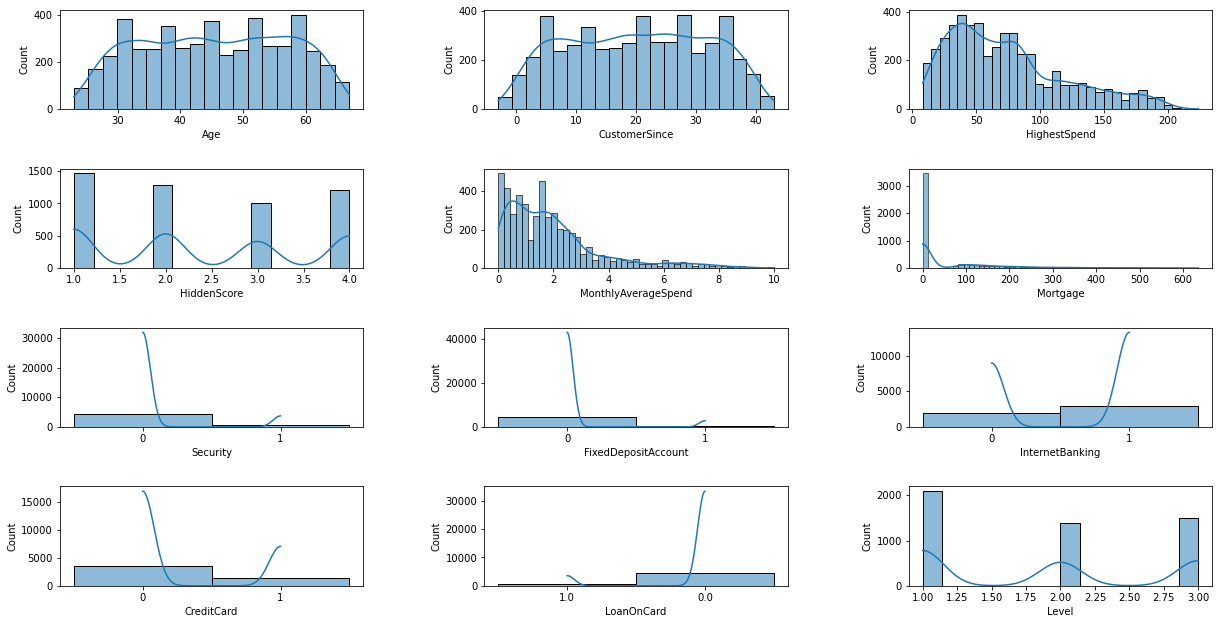

In [84]:
plt.figure(figsize=(20,10))
plt.subplot(4,3,1)
sns.histplot(data,x='Age',kde=True)
plt.subplot(4,3,2)
sns.histplot(data,x='CustomerSince',kde=True )
plt.subplot(4,3,3)
sns.histplot(data,x='HighestSpend' ,kde=True )
plt.subplot(4,3,4)
sns.histplot(data,x='HiddenScore' ,kde=True )
plt.subplot(4,3,5)
sns.histplot(data,x='MonthlyAverageSpend' ,kde=True )
plt.subplot(4,3,6)
sns.histplot(data,x='Mortgage' ,kde=True )
plt.subplot(4,3,7)
sns.histplot(data,x='Security' ,kde=True )
plt.subplot(4,3,8)
sns.histplot(data,x='FixedDepositAccount',kde=True )
plt.subplot(4,3,9)
sns.histplot(data,x='InternetBanking',kde=True )
plt.subplot(4,3,10)
sns.histplot(data,x='CreditCard',kde=True )
plt.subplot(4,3,11)
sns.histplot(data,x='LoanOnCard',kde=True )
plt.subplot(4,3,12)
sns.histplot(data,x='Level',kde=True )
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)
plt.show()

# Conclusion:

1.Maximum no of account holders are in age 30-33 and 55-60.

2.Maximum no of account holders are customers since 5,20,30,36 years.

3.Maximum no of account holders have highest spend around 40.

4.Maximum no of account holders have hidden score of 1.

5.Maximum no of account holders have monthly average spend around 0.5.

6.Maximum no of account holders have zero mortgage.

7.Maximum no of account holders have no security.

8.Maximum no of account holders have no Fixed deposit account.

9.Maximum no of account holders have internet banking.

10.Maximum no of account holders have no credit card.

11.Maximum no of account holders have no loan on card.

12.Maximum no of account holders have level of 1.

# Bivariate Analysis

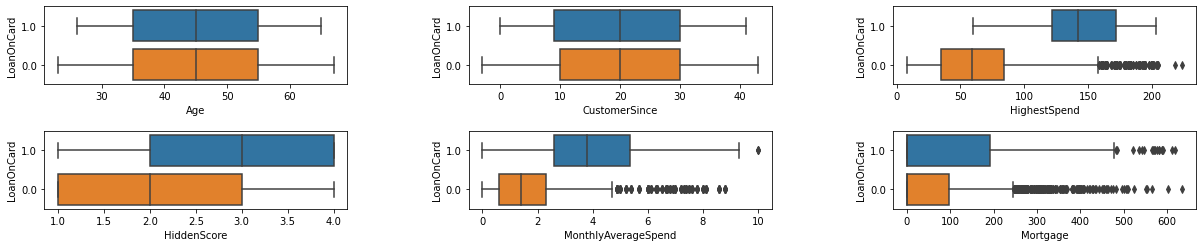

In [85]:
plt.figure(figsize=(20,10))
plt.subplot(5,3,1)
sns.boxplot(data=data,x='Age',y='LoanOnCard')
plt.subplot(5,3,2)
sns.boxplot(data=data,x='CustomerSince',y='LoanOnCard')
plt.subplot(5,3,3)
sns.boxplot(data=data,x='HighestSpend' ,y='LoanOnCard')
plt.subplot(5,3,4)
sns.boxplot(data=data,x='HiddenScore' ,y='LoanOnCard')
plt.subplot(5,3,5)
sns.boxplot(data=data,x='MonthlyAverageSpend' ,y='LoanOnCard')
plt.subplot(5,3,6)
sns.boxplot(data=data,x='Mortgage' ,y='LoanOnCard')


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)
plt.show()

#Conclusions

We can find outliers on Highestspend,MonthlyAverageSpend and Mortgage

# Multivariant Analysis

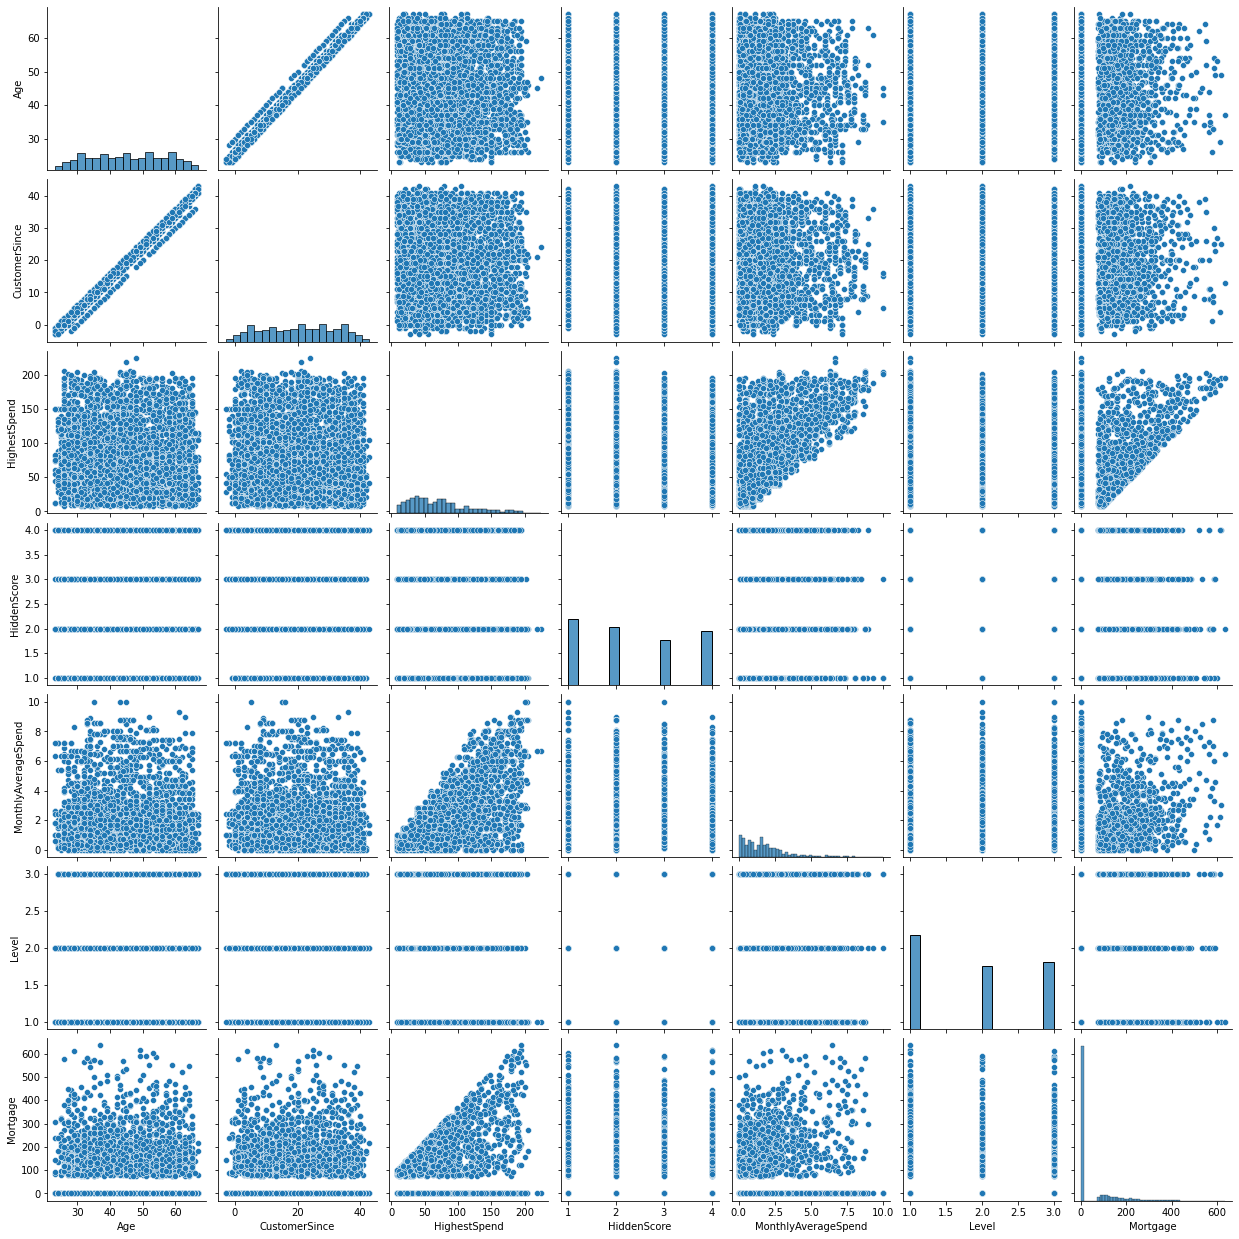

In [86]:
sns.pairplot(data)

<AxesSubplot:>

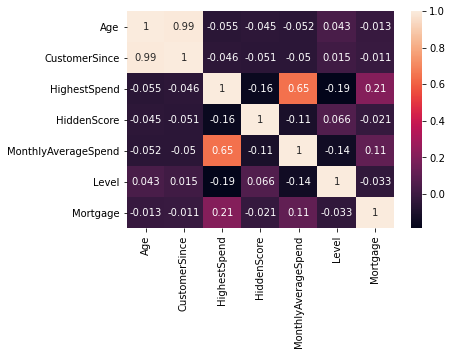

In [87]:
sns.heatmap(data.corr(), annot=True)# plot the correlation coefficients as a heatmap

Conclutions:
    
1.CustomerSince and age has high positive correlation.

2.HighestSpend and MonthlyAveragespend has positive correlation.

4. Data pre-processing:
• Segregate predictors vs target attributes
• Check for target balancing and fix it if found imbalanced.
• Perform train-test split.

In [88]:
X=data.iloc[:,0:-1] #Predictors

In [89]:
y=data['LoanOnCard'] #target

In [90]:
y.value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

We can find there is an imbalance of data so we have to follow sampling technique to balance the data.

In [91]:
'min_Dependents',

In [92]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# HyperParameter tuning

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [95]:
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.951805392879183


In [96]:
logreg1 = LogisticRegression(C= 10.0, penalty='l2')

In [97]:
logreg1.fit(X_train, y_train)

LogisticRegression(C=10.0)

In [98]:
pred_test = logreg1.predict(X_test)

In [99]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred_test))

0.9327309236947792


In [100]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_test)

array([[872,  14],
       [ 53,  57]], dtype=int64)

# Without hyperparameter tuning

In [101]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [102]:
pred_test = logreg.predict(X_test)

In [103]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred_test))

0.9377510040160643


#without resampling and hyperparameter we are getting 93% accuracy

In [104]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_test)

array([[875,  11],
       [ 51,  59]], dtype=int64)

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97       886
         1.0       0.84      0.54      0.66       110

    accuracy                           0.94       996
   macro avg       0.89      0.76      0.81       996
weighted avg       0.93      0.94      0.93       996



# Handling target imbalance using SMOTE

In [106]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [107]:
y_resampled.value_counts()

1.0    3614
0.0    3614
Name: LoanOnCard, dtype: int64

5. Model training, testing and tuning:
• Design and train a Logistic regression and Naive Bayes classifiers.
• Display the classification accuracies for train and test data.
• Display and explain the classification report in detail.
• Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with 
your comments for selecting this model

In [108]:
logreg.fit(X_resampled, y_resampled)

LogisticRegression()

In [109]:
#Predict for test set
pred_test = logreg.predict(X_test)

In [110]:
pred_test

array(['0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '0.0', '1.0', '0.0', '0.0', '0.0',
       '1.0', '0.0', '0.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '0.0', '1.0', '1.0', '0.0', '0.0',
       '1.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '0.0', '1.0', '0.0', '0.0', '0.0',
       '1.0', '0.0', '0.0', '1.0', '0.0', '1.0', '1.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '1.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '1.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '1.0', '0.0', '0.0', '0.0', '0.0',
       '1.0', '0.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '1.0',
       '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '0.0', '1.0', '0.0', '0.0', '1.0',
       '1.0', '0.0',

In [111]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred_test))

0.8734939759036144


In [112]:
confusion_matrix(y_test, pred_test)

array([[773, 113],
       [ 13,  97]], dtype=int64)

In [113]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92       886
         1.0       0.46      0.88      0.61       110

    accuracy                           0.87       996
   macro avg       0.72      0.88      0.77       996
weighted avg       0.93      0.87      0.89       996



In [114]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_resampled, y_resampled)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [115]:
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.8876551227380528


In [116]:
logreg = LogisticRegression(C= 0.1, penalty='l2')

In [117]:
logreg.fit(X_resampled, y_resampled)

LogisticRegression(C=0.1)

In [118]:
print(accuracy_score(y_test, pred_test))

0.8734939759036144


In [119]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92       886
         1.0       0.46      0.88      0.61       110

    accuracy                           0.87       996
   macro avg       0.72      0.88      0.77       996
weighted avg       0.93      0.87      0.89       996



# Conclusion:

1.Without Hyperparameter tuning and without target balancing, we get accuracy of 93%

2.With hyperparameter tuning and with target balancing, we get accuracy of 88%

3.With Hyperparameter tuning and without target balancing, we get accuracy of 93%

# We can proceed with logistic regression without hyperparameter tuning and target balancing as it gives maximum accuracy of 93%

# Imputation:
Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points 
collected by the research team to perform a better data analysis in future

# Please collect conversion data after introducing offers and low interest rate,After getting conversion data we would be able to predict future possible customers.